# Project on Data Analysis for Zomato using python

# Step 1: Import Important Python libraries

In [6]:
import pandas as pd # used for data manipulation and analysis
import numpy as np # used for numerical operations
import matplotlib.pyplot as plt # data visualisation 
import seaborn as sns # data visualisation 

# Step 2: Create the data frame

In [8]:
dataframe =pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:
dataframe = pd.read_csv("Zomato data .csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Step 3 : Conversion into required format

In [12]:
dataframe.info() # observing the given data information beofre conversionb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [14]:
def handleRate(value):
    value= str(value).split('/')
    value= value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [15]:
dataframe.info() # dataframe summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


from the above two dtaframe.info() we collected the data converted data types 

Conclusion:- from the above summary we observed that there is no null values in given dataframebb

# Step 4:- Finding type of restaurant category and plotting graph

Text(0.5, 0, 'Types of restaurant')

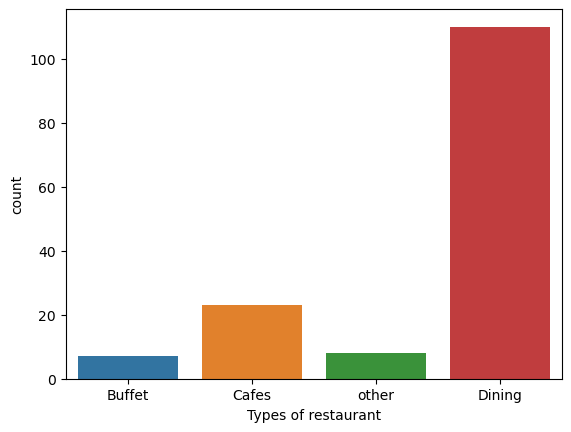

In [17]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Types of restaurant")

Text(0, 0.5, 'Votes')

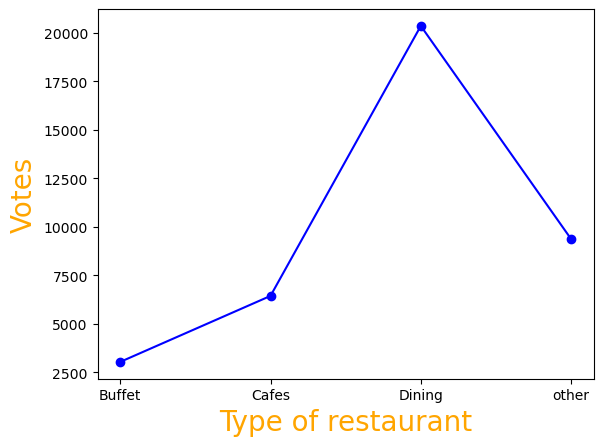

In [18]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c="blue", marker='o')
plt.xlabel("Type of restaurant", c="orange", size=20)
plt.ylabel("Votes", c="orange", size=20)

Conclusion:- frome the above visual representation we observed that the majority of restaurants are falling under dining category and dining restaurant are preferred by large number of individuals.

The Dining type of restaurants are recieved majority of ratings which are above 20k

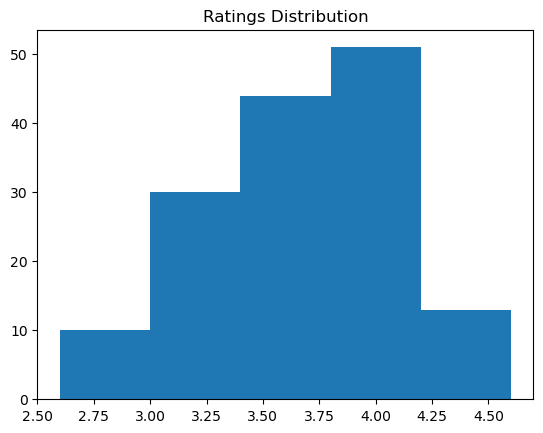

In [19]:
plt.hist(dataframe['rate'], bins=5)
plt.title("Ratings Distribution")
plt.show()

Conclusion:- The majority of restaurants recieved ratings from 3.5 to 4 
    The Majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

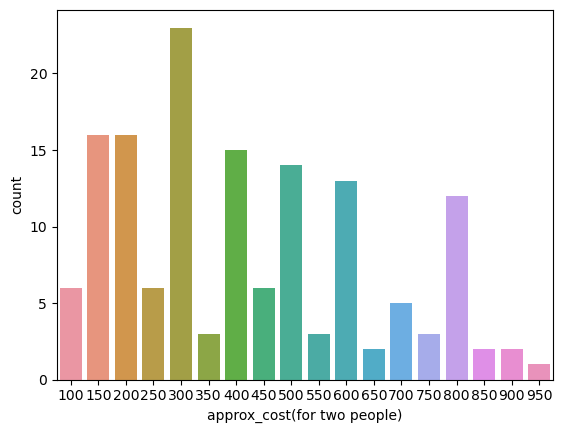

In [20]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

# Step5: Finding What type of restaurants recieved good ratings 

<Axes: xlabel='online_order', ylabel='rate'>

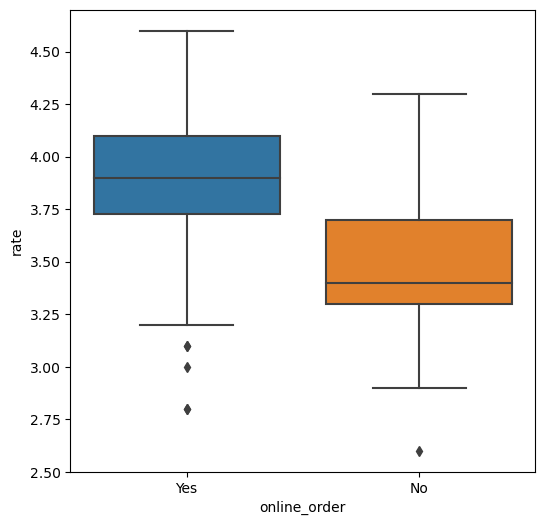

In [21]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data= dataframe)

Conclusion:- from the above boxplot we observed that offline orders recived lower ratings in comparision to online order which obtained excellent ratings

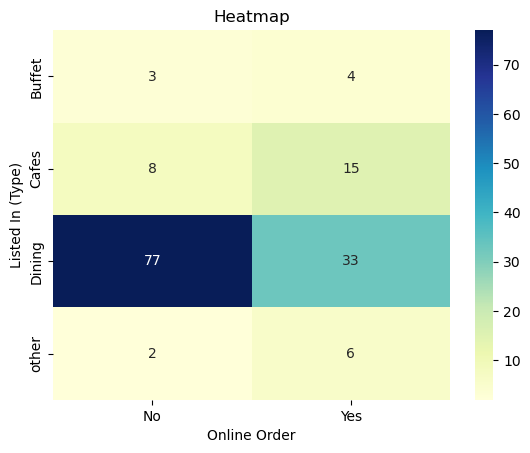

In [30]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

Conclusion:- The heatmap shows that dining restaurants accepts offline orders whereas cafes primarily recieves online orders. This suggests us that customer prefer to place orders in person at resaturants and prefer online ordering at cafes.